In [1]:
%pip install yfinance

**Reasoning**:
Import pandas and yfinance, define a list of stock tickers, and download historical stock data using yfinance.



In [12]:
import pandas as pd
import yfinance as yf

tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 'SBIN.NS', 'BHARTIARTL.NS', 'ITC.NS', 'LT.NS', 'HINDUNILVR.NS', '^NSEI']
start_date = '2020-01-01'
end_date = '2024-01-01'

stock_data = yf.download(tickers, start=start_date, end=end_date)
display(stock_data.head())

/tmp/ipython-input-12-3216421047.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  11 of 11 completed


Price              Close                                                      \
Ticker     BHARTIARTL.NS  HDFCBANK.NS HINDUNILVR.NS ICICIBANK.NS     INFY.NS   
Date                                                                           
2020-01-01    433.316498  1214.072388   1770.764282   523.143677  646.518799   
2020-01-02    435.132690  1221.811279   1772.135620   526.895996  644.632324   
2020-01-03    435.037109  1204.387451   1762.443115   525.190369  654.546997   
2020-01-06    429.827362  1178.322510   1751.470337   512.373779  648.273621   
2020-01-07    425.477966  1196.980835   1756.270874   509.644745  638.665955   

Price                                                                     ...  \
Ticker          ITC.NS        LT.NS RELIANCE.NS     SBIN.NS       TCS.NS  ...   
Date                                                                      ...   
2020-01-01  186.567139  1218.053223  678.021301  308.602600  1986.125610  ...   
2020-01-02  187.938416  1250.923584  689.564331  313.077728  1977.008545  ...   
2020-01-03  186.880569  1241.392578  690.395142  307.910492  2016.408569  ...   
2020-01-06  184.216461  1224.376465  674.383362  294.346588  2016.225464  ...   
2020-01-07  184.412354  1227.863281  684.758606  293.792938  2021.173096  ...   

Price           Volume                                                        \
Ticker     HDFCBANK.NS HINDUNILVR.NS ICICIBANK.NS  INFY.NS   ITC.NS    LT.NS   
Date                                                                           
2020-01-01     1836849        543035      7642793  2112415  4208837  3123998   
2020-01-02     3068583        663275     10264223  5658200  8402979  4335359   
2020-01-03     5427775       1598825      9594690  7882938  9284478  2059871   
2020-01-06     5445093        683129     12534334  6519403  7636617  2646905   
2020-01-07     7362247        808935     16101835  7899363  8416741  2077893   

Price                                                
Ticker     RELIANCE.NS   SBIN.NS   TCS.NS     ^NSEI  
Date                                                 
2020-01-01    14004468  17379320  1354908  304100.0  
2020-01-02    17710316  20324236  2380752  407700.0  
2020-01-03    20984698  21853208  4655761  428800.0  
2020-01-06    24519177  35645325  3023209  396500.0  
2020-01-07    16683622  50966826  2429317  447800.0  

[5 rows x 55 columns]

In [14]:
daily_returns = stock_data['Close'].pct_change()
display(daily_returns.head())

/tmp/ipython-input-14-2116368471.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_data['Close'].pct_change()


Ticker,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,SBIN.NS,TCS.NS,^NSEI
Date,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.004191,0.006374,0.000774,0.007173,-0.002918,0.007350,0.026986,0.017025,0.014501,-0.004590,0.008184
2020-01-03,-0.000220,-0.014261,-0.005469,-0.003237,0.015380,-0.005629,-0.007619,0.001205,-0.016505,0.019929,-0.004523
2020-01-06,-0.011975,-0.021642,-0.006226,-0.024404,-0.009584,-0.014256,-0.013707,-0.023192,-0.044051,-0.000091,-0.019106
2020-01-07,-0.010119,0.015835,0.002741,-0.005326,-0.014820,0.001063,0.002848,0.015385,-0.001881,0.002454,0.004995


In [15]:
print("Missing values before handling:")
print(daily_returns.isnull().sum())

daily_returns = daily_returns.dropna()

print("\nMissing values after handling:")
print(daily_returns.isnull().sum())

Missing values before handling:
Ticker
BHARTIARTL.NS    1
HDFCBANK.NS      1
HINDUNILVR.NS    1
ICICIBANK.NS     1
INFY.NS          1
ITC.NS           1
LT.NS            1
RELIANCE.NS      1
SBIN.NS          1
TCS.NS           1
^NSEI            1
dtype: int64

Missing values after handling:
Ticker
BHARTIARTL.NS    0
HDFCBANK.NS      0
HINDUNILVR.NS    0
ICICIBANK.NS     0
INFY.NS          0
ITC.NS           0
LT.NS            0
RELIANCE.NS      0
SBIN.NS          0
TCS.NS           0
^NSEI            0
dtype: int64


In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(daily_returns)

PCA()

In [17]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

loadings = pd.DataFrame(pca.components_.T, index=daily_returns.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance Ratio:")
print(cumulative_explained_variance)

print("\nStock Loadings on the first few Principal Components:")
display(loadings.head())

Explained Variance Ratio for each component:
[0.49316679 0.10776065 0.07379158 0.06806031 0.06429732 0.04981139
 0.04723232 0.04110328 0.03061784 0.02270474 0.00145379]

Cumulative Explained Variance Ratio:
[0.49316679 0.60092744 0.67471902 0.74277933 0.80707665 0.85688804
 0.90412036 0.94522363 0.97584147 0.99854621 1.        ]

Stock Loadings on the first few Principal Components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Ticker,,,,,,,,,,,
BHARTIARTL.NS,0.251400,0.035632,0.754700,-0.375904,-0.438582,-0.145749,-0.001395,-0.087767,0.000634,-0.024993,-0.052203
HDFCBANK.NS,0.326828,-0.125904,-0.190165,-0.108398,-0.227941,0.184802,0.036533,0.629434,-0.565865,0.022385,-0.158379
HINDUNILVR.NS,0.172836,0.286567,0.170098,0.226726,0.063790,0.634706,-0.572171,-0.218616,-0.143490,-0.004115,-0.070493
ICICIBANK.NS,0.423671,-0.309427,-0.262830,-0.196327,-0.105660,0.065991,-0.331614,0.141849,0.673742,0.073808,-0.110225
INFY.NS,0.273008,0.557029,-0.195563,-0.305210,0.223088,-0.160598,0.029054,0.016712,0.035378,-0.631140,-0.086685


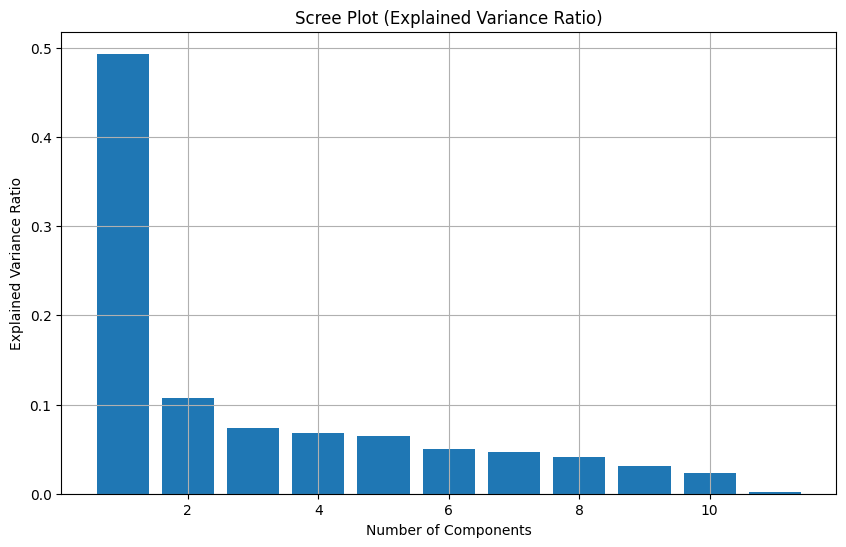

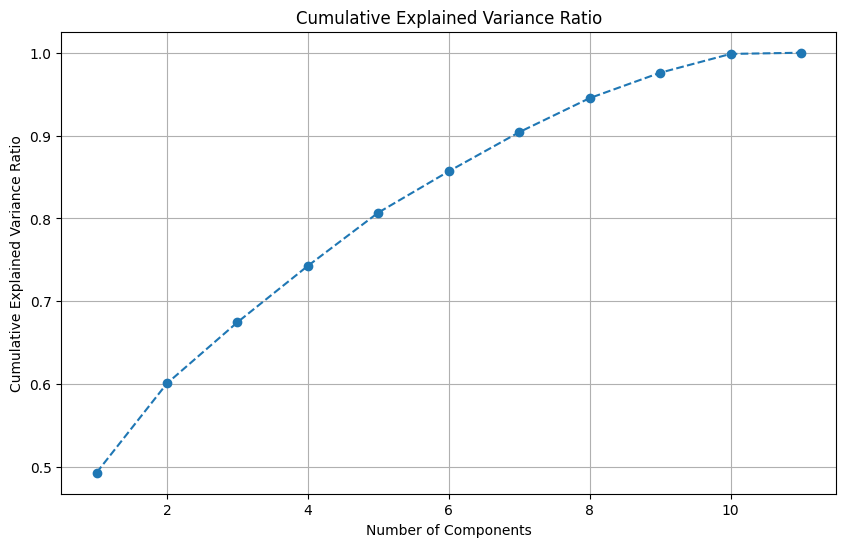

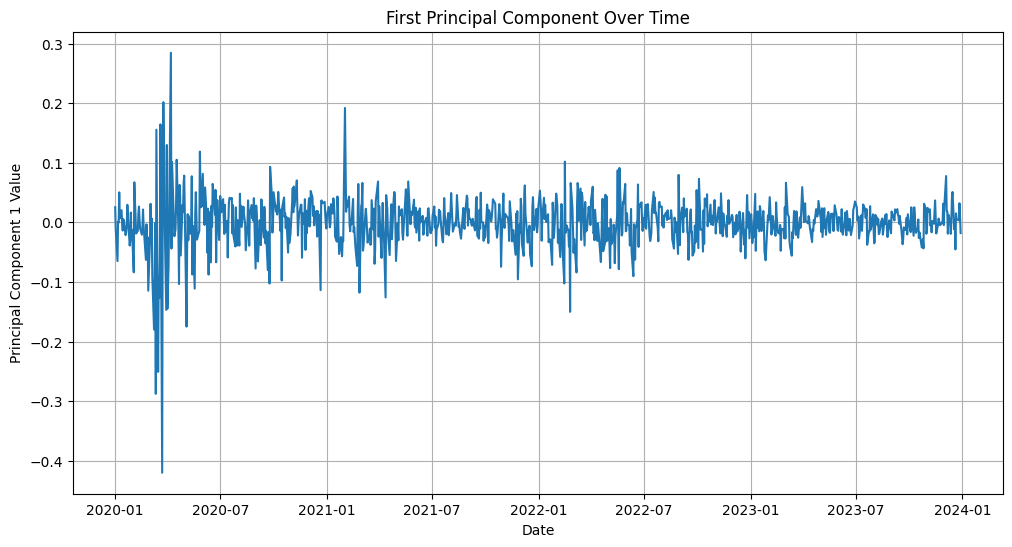

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Explained Variance Ratio)')
plt.grid(True)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)


principal_components = pca.transform(daily_returns)
principal_components_df = pd.DataFrame(principal_components, index=daily_returns.index, columns=[f'PC{i+1}' for i in range(pca.n_components_)])


plt.figure(figsize=(12, 6))
plt.plot(principal_components_df.index, principal_components_df['PC1'])
plt.xlabel('Date')
plt.ylabel('Principal Component 1 Value')
plt.title('First Principal Component Over Time')
plt.grid(True)

plt.show()

In [20]:
-print("Interpretation of Principal Components:")
print("-" * 35)

print("PC1 (Explained Variance: {:.2f}%)".format(explained_variance_ratio[0] * 100))
print("Loadings:")
print(loadings['PC1'].sort_values(ascending=False))
print("Interpretation: PC1 likely represents the overall market movement or a broad market factor, as most stocks have positive loadings on this component. Stocks like ICICIBANK.NS, SBIN.NS, and HDFCBANK.NS have high positive loadings, indicating they are strongly influenced by this overall market factor. ^NSEI (NIFTY50) also has a strong positive loading, reinforcing that PC1 captures the general market trend.")
print("-" * 35)

print("PC2 (Explained Variance: {:.2f}%)".format(explained_variance_ratio[1] * 100))
print("Loadings:")
print(loadings['PC2'].sort_values(ascending=False))
print("Interpretation: PC2 shows a strong positive loading for INFY.NS and TCS.NS. This suggests PC2 might capture factors specific to the IT sector or a divergence between IT stocks and others in the dataset.")
print("-" * 35)

print("PC3 (Explained Variance: {:.2f}%)".format(explained_variance_ratio[2] * 100))
print("Loadings:")
print(loadings['PC3'].sort_values(ascending=False))
print("Interpretation: PC3 has a high positive loading for BHARTIARTL.NS and ITC.NS. This component could represent factors influencing these specific stocks differently from others, potentially related to their respective sectors (telecom and consumer goods).")
print("-" * 35)

Interpretation of Principal Components:
-----------------------------------
PC1 (Explained Variance: 49.32%)
Loadings:
Ticker
ICICIBANK.NS     0.423671
SBIN.NS          0.400319
HDFCBANK.NS      0.326828
RELIANCE.NS      0.315807
LT.NS            0.313652
^NSEI            0.295745
INFY.NS          0.273008
BHARTIARTL.NS    0.251400
TCS.NS           0.225619
ITC.NS           0.222132
HINDUNILVR.NS    0.172836
Name: PC1, dtype: float64
Interpretation: PC1 likely represents the overall market movement or a broad market factor, as most stocks have positive loadings on this component. Stocks like ICICIBANK.NS, SBIN.NS, and HDFCBANK.NS have high positive loadings, indicating they are strongly influenced by this overall market factor. ^NSEI (NIFTY50) also has a strong positive loading, reinforcing that PC1 captures the general market trend.
-----------------------------------
PC2 (Explained Variance: 10.78%)
Loadings:
Ticker
INFY.NS          0.557029
TCS.NS           0.475674
HINDUNILVR.NS   